Viz Features to work on:

Create topic ontology

Additional columns to work on
- isLocal, locale (country)
- human language

Nits
- reorder in likely level of interest - topics first

Export using
```
jupyter nbconvert --no-input --output-dir=docs --output=index covid-project-report.ipynb --to html --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}'
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FixedLocator, LogLocator
from IPython.display import Markdown as md
import numpy as np
import seaborn as sns
import datetime

# CONFIGURATION
date_github_published = '2020-07-13'


COMMA_FMT = StrMethodFormatter('{x:,g}')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title#set ticks every week


In [2]:
# print(date_github_published)
projects = pd.read_csv(date_github_published+'.tsv', sep='\t')
# convert string dates to datetime
projects['repo_created_day'] = pd.to_datetime(projects['repo_created_day'], format='%Y-%m-%d')

md("""
# GitHub covid-19-repo-data report

This is a summary of the data on GitHub COVID-19 projects that is posted by GitHub at https://github.com/github/covid-19-repo-data.

This page is hosted at https://estaub.github.io/covid-project-report/.

Source for this jupyter notebook is at https://github.com/estaub/covid-project-report.  
If you have suggestions for improvements, please feel free to open an issue there.

There are __{} projects__ as of GitHub data release date: __{}__
""".format(f'{len(projects.index):,}',date_github_published))


# GitHub covid-19-repo-data report

This is a summary of the data on GitHub COVID-19 projects that is posted by GitHub at https://github.com/github/covid-19-repo-data.

This page is hosted at https://estaub.github.io/covid-project-report/.

Source for this jupyter notebook is at https://github.com/estaub/covid-project-report.  
If you have suggestions for improvements, please feel free to open an issue there.

There are __92,808 projects__ as of GitHub data release date: __2020-07-13__


In [3]:
##########################
#print(projects.dtypes)
#print(type(projects['repo_created_day'][0]).__name__)
#projects.head()

primary
covid-19                 10027
data                      1224
coronavirus-tracking      1222
python                    1063
reactjs                    802
api                        569
javascript                 498
visualization              379
india                      372
analysis                   340
android                    316
coronavirus-real-time      314
coronavirus-info           256
html                       244
css                        222
nodejs                     201
machine-learning           198
flutter                    195
r                          161
dashboard                  159
data-science               159
java                       157
flask                      142
typescript                 136
deep-learning              126
pandas                     118
material-ui                116
chartjs                    115
jupyter-notebook           105
vuejs                      103
epidemiology                88
react-native                88


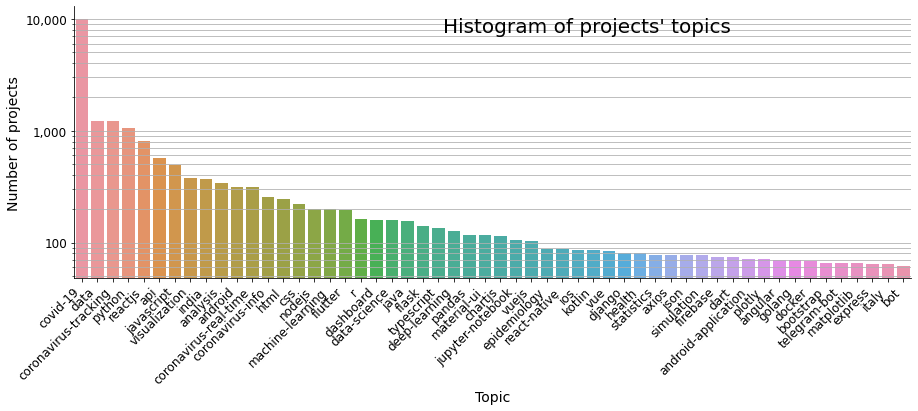

In [4]:
topics = projects['topics'].str.split(', ').dropna()
# print(topics)
flat_topics = topics.explode()
# print(flat_topics)

topic_counts = flat_topics.value_counts()
big_topic_counts = topic_counts[topic_counts > 60]
# print(big_topic_counts)

synonyms = [
    ['covid-19', 'coronavirus', 'covid19', 'covid', 'corona', 'sars-cov-2', 'covid-virus', '2019-ncov', 'covid-2019', 'ncov', 'pandemic', 'virus',
        'coronavirus-globaloutbreak'],
    ['data', 'dataset', 'covid19-data', 'covid-data', 'covid-19-data'],
    ['python', 'python3'],
    ['reactjs', 'react'],
    ['html','html5'],
    ['coronavirus-tracking', 'coronavirus-tracker', 'covid19-tracker', 'tracker'],
    ['css', 'css3'],
    ['android', 'android-app'],
    ['italy', 'covid-19-italy'],
    ['india', 'covid-19-india'],
    ['api','covid-api', 'rest-api'],
    ['visualization', 'data-visualization'],
    ['analysis','coronavirus-analysis', 'data-analysis']
    ]
DOMAIN_TT = 'domain'
FUNCTION_TT = 'function'
TECH_TT = 'technology'

topic_types = {
    DOMAIN_TT: ['covid-19', 'coronavirus-tracking', 'india', 'coronavirus-real-time', 'coronavirus-info', 
                'analysis','epidemiology','health','statistics','italy'],
    FUNCTION_TT: ['data', 'api', 'visualization', 'machine-learning','dashboard','data-science','simulation','telegram-bot','bot'],
    TECH_TT: ['python', 'reactjs', 'javascript', 'android', 'html', 'css', 'nodejs', 'flutter','r','java','flask','typescript',
             'pandas','material-ui','chartjs','jupyter-notebook','vuejs','react-native','ios','kotlin','vue','django','json',
             'axios','dart','firebase','plotly','angular','golang','docker','bootstrap','express']
}

def syn_find(name:str, arr:list):
    try: 
        arr.index(name)
        return arr[0]
    except ValueError: 
        return None
def syn_mapper(name: str):
    for syn_list in synonyms:
        primary = syn_find(name, syn_list)
        if primary:
            return primary
    return name
primaries = big_topic_counts.index.map(syn_mapper)
big_topic_counts_syn=pd.DataFrame({"primary":primaries, 'count':big_topic_counts.values})
big_topic_counts_syn =big_topic_counts_syn.groupby('primary')['count'].sum().sort_values(ascending=False)
print(big_topic_counts_syn)

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=ax, x=big_topic_counts_syn.index, y=big_topic_counts_syn.values)

fig.suptitle('Histogram of projects\' topics', x=.6, y=.85)
ax.set_yscale("log")
ax.set_xlabel('Topic')
ax.set_ylabel('Number of projects')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(COMMA_FMT)
sns.despine()
plt.grid(axis='y', which='both')
plt.show()


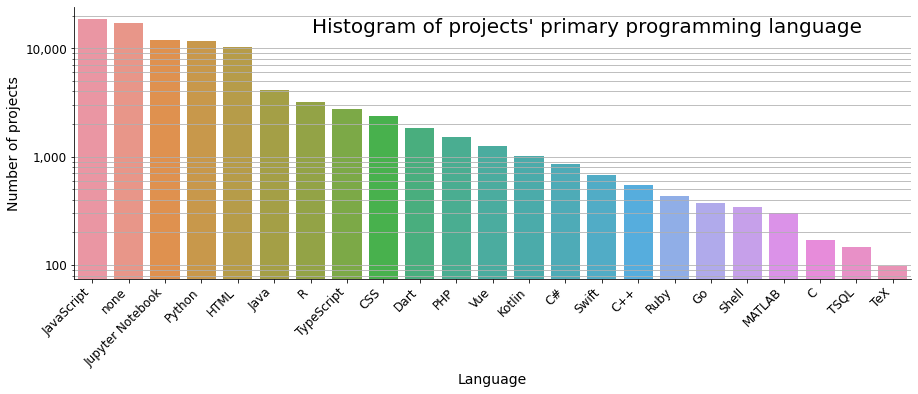

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
categories = projects['primary_language_name'].fillna('none').value_counts()
multicats = categories[categories > 75]

sns.barplot(ax=ax, x=multicats.index, y=multicats.values)

fig.suptitle('Histogram of projects\' primary programming language', x=.6, y=.85)
ax.set_yscale("log")
ax.set_xlabel('Language')
ax.set_ylabel('Number of projects')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(COMMA_FMT)
sns.despine()
plt.grid(axis='y', which='both')
plt.show()

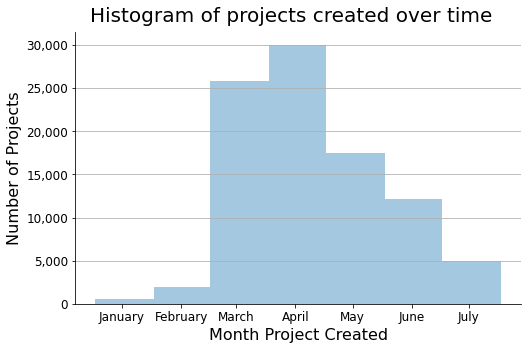

In [6]:
#plot data
months = range(1,9)
first_of_months = [ datetime.date.toordinal(datetime.date(2020, month, 1)) for month in months]
fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle('Histogram of projects created over time', y=.95)
# projects['repo_created_day'].hist(bins=10, ax=ax)
sns.distplot(projects['repo_created_day'].dt.date.apply(datetime.date.toordinal), bins=first_of_months, ax=ax, kde=False, norm_hist=False)
sns.despine()
# print(projects['repo_created_day'].dt.date.apply(datetime.date.toordinal))
middle_of_months = [ first+14 for first in first_of_months ]
ax.xaxis.set_major_locator(FixedLocator(middle_of_months))
ax.set_xticklabels([datetime.date.fromordinal(int(item)).strftime('%B') for item in ax.get_xticks()])
ax.yaxis.set_major_formatter(COMMA_FMT)
ax.set_xlabel('Month Project Created', fontsize=16)
ax.set_ylabel('Number of Projects', fontsize=16)
plt.grid(axis='y')
plt.show()
#ax.xaxis.set_major_locator(mdates.DayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))



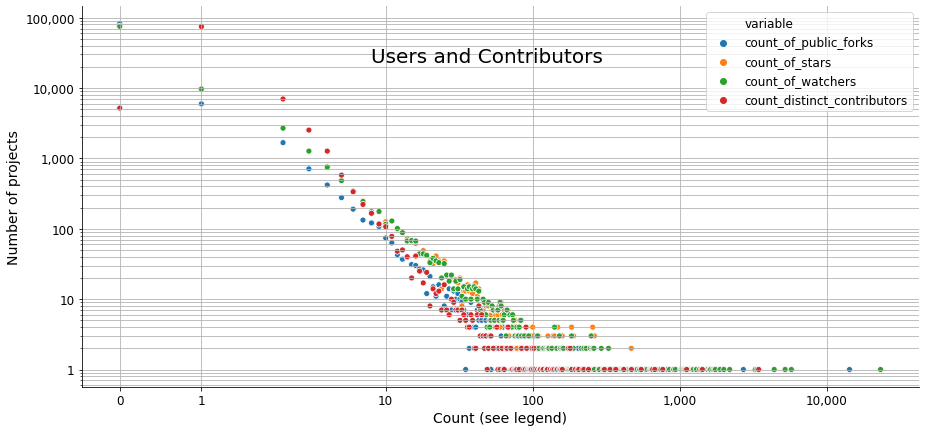

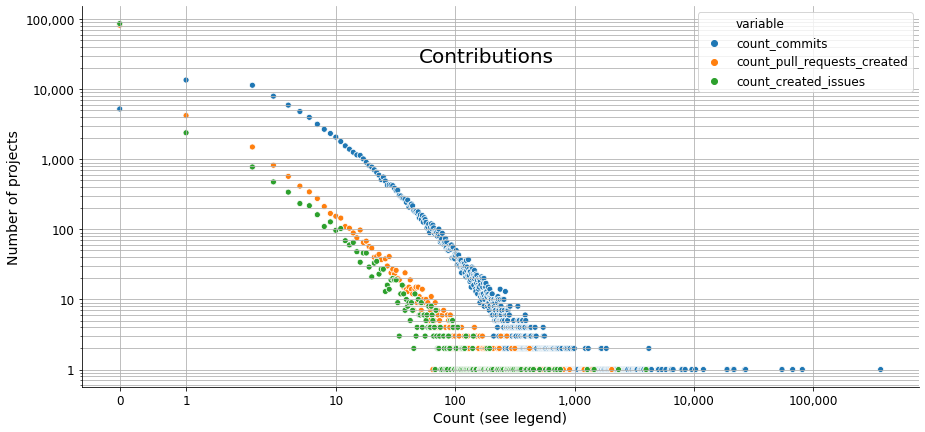

In [7]:
projects['primary_language_name'].fillna('none').astype('category')

counts = [
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
    'count_contributions',
    'count_commits',        
    'count_commit_comments', 
    'count_created_issues', 
    'count_pull_requests_created',
    'count_pull_requests_reviews',
    'count_comments_on_issues_and_pull_requests']


#sns.boxplot(data = projects, order=counts, orient = "h")
#plt.show()

countHists = {}
for col in counts:
    countHists[col] = projects[col].value_counts()
    #print(countHists)

def plot_counts(cols, suptitle='suptitle'):
    selectedHists = { col: countHists[col] for col in cols }
    dfHists = pd.DataFrame.from_dict(selectedHists)
    dfLong = pd.melt(dfHists.reset_index(), id_vars='index', value_vars=cols, value_name='n_projects').dropna()
    # print(dfLong)
    f, ax = plt.subplots(figsize=(15,7))
    f.suptitle(suptitle, y=.8)
    sns.scatterplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    # sns.distplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    sns.despine(offset=0)
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    ax.set_xscale("symlog")
    ax.set_yscale("log")
    ax.xaxis.set_major_formatter(COMMA_FMT)
    ax.yaxis.set_major_formatter(COMMA_FMT)
    ax.set_xlabel('Count (see legend)')
    ax.set_ylabel('Number of projects')

    plt.grid(axis='both', which='both')
    plt.show()
    
plot_counts([    
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
], suptitle='Users and Contributors')    
    
plot_counts([    
    'count_commits',
    'count_pull_requests_created',
    'count_created_issues'
], suptitle='Contributions')    
    


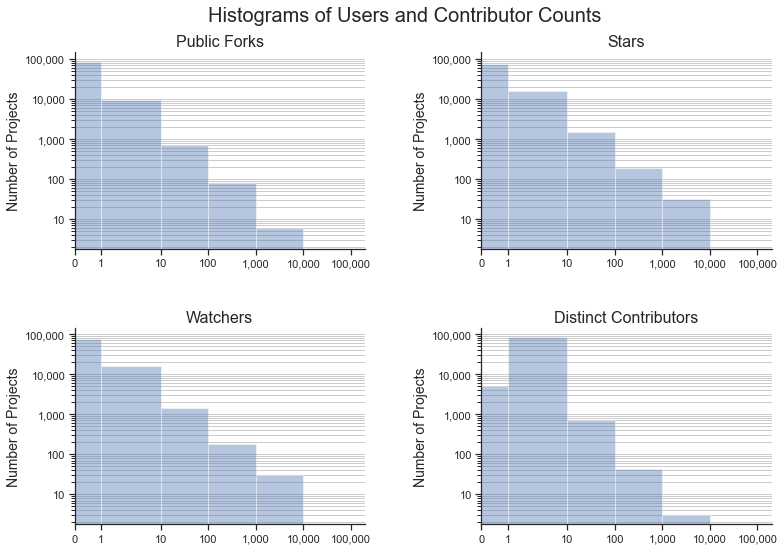

In [8]:
def count_format(col_name):
        lab = col_name.replace('variable = count_','').replace('of_','').replace('_',' ').title()
        return lab

def plot_counts2(cols, suptitle='suptitle'):
    sns.set(style="ticks")
    selected = projects[cols]
    long_frame = pd.melt(selected, value_vars=cols, value_name='n_projects').dropna()

    # print(long_frame)
    g = sns.FacetGrid(long_frame, col='variable', col_wrap=2 if len(cols)>3 else 2, height=4, aspect=1.33)
    g = g.map(sns.distplot, 'n_projects', kde=False, norm_hist=False, bins=[0,1,10,100,1000,10000,100000])
    g.set(xscale="symlog", yscale="log", xlim=(0, 200000), xlabel='')
    g.fig.subplots_adjust(top=.9,wspace=.4, hspace=.4)
    g.fig.suptitle(suptitle)
    for ax in g.axes.flatten():
        ax.grid(axis='y', which='both')
        ax.set_title(count_format(ax.get_title()), fontsize=16)
        ax.set_ylabel('Number of Projects', fontsize=14)
        ax.xaxis.set_major_formatter(COMMA_FMT)
        ax.yaxis.set_major_formatter(COMMA_FMT)
        # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# sns.scatterplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    # sns.distplot(data=dfLong, x='index', y='n_projects', hue='variable', ax=ax )
    sns.despine(offset=0)
    plt.show()
    
plot_counts2([    
    'count_of_public_forks',
    'count_of_stars',
    'count_of_watchers',
    'count_distinct_contributors',
], suptitle='Histograms of Users and Contributor Counts')    
    

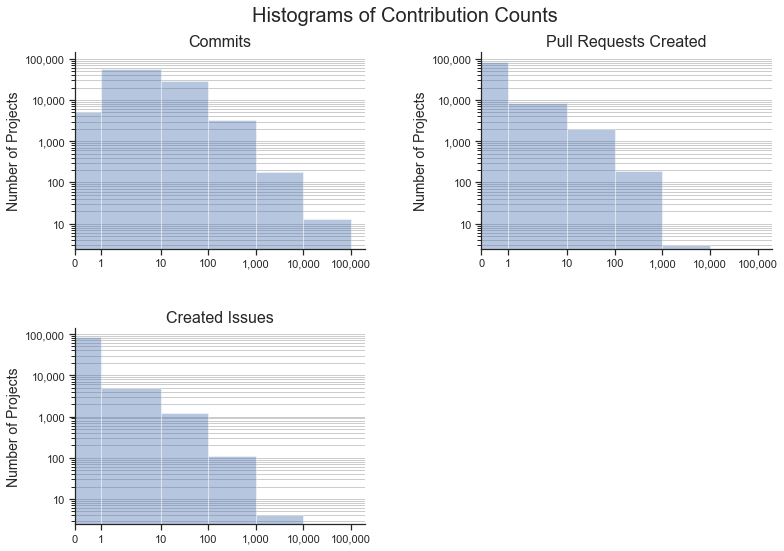

In [9]:
plot_counts2([    
    'count_commits',
    'count_pull_requests_created',
    'count_created_issues'
], suptitle='Histograms of Contribution Counts')    